<a href="https://colab.research.google.com/github/pxblo1/IA_IB__AgoDec2024/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6.- Artificial Neural Network: feedforward.

Personal Data


*     Team Names:
   *  Pablo Emiliano Martinez Perez  ID. 2003785
   *    Andrea Mayela Santos Garcia  ID. 1948005
   *  Alejandra Sepulveda Rojas ID. 2017856
   *    Ingrid Edith Martinez Andrade  ID. 1995361
*   Class time. Thursday // N4 – N6






Load libraries

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

Load data

In [4]:
#Loads the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Data preprocessing

In [5]:
#Reshape and normalize the images.
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Model selection and training

In [6]:
#Define FNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Compile the FNN model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#train model
history = model.fit(train_images, train_labels, epochs=8, batch_size=512)

Epoch 1/8
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6513 - loss: 1.0837
Epoch 2/8
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9036 - loss: 0.3289
Epoch 3/8
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9281 - loss: 0.2463
Epoch 4/8
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9403 - loss: 0.2092
Epoch 5/8
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9485 - loss: 0.1793
Epoch 6/8
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9549 - loss: 0.1569
Epoch 7/8
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9580 - loss: 0.1443
Epoch 8/8
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9603 - loss: 0.1365


Model testing

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9704 - loss: 0.1066
test_acc: 0.9740999937057495


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted label: 7, True label: 7
Predicted label: 2, True label: 2
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 4, True label: 4
Predicted label: 1, True label: 1
Predicted label: 4, True label: 4
Predicted label: 9, True label: 9
Predicted label: 5, True label: 5
Predicted label: 9, True label: 9


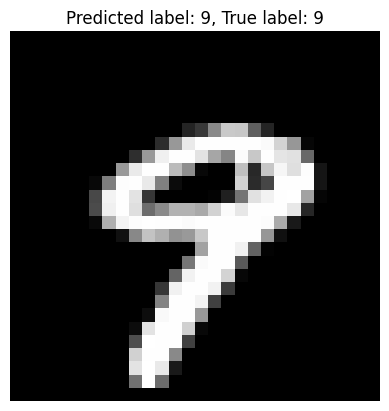

In [9]:
#perform predictions
predictions = model.predict(test_images[:10])
for i in range(10):
  predicted_label = tf.argmax(predictions[i]).numpy()
  true_label = tf.argmax(test_labels[i]).numpy()
  print(f"Predicted label: {predicted_label}, True label: {true_label}")

#Display the imagene
plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
plt.title(f"Predicted label: {predicted_label}, True label: {true_label}")
plt.axis('off')
plt.show()